# Forecasting

In [1]:
install.packages('fpp')
install.packages('dplyr')

Installing package into 'C:/Users/anfiniti/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'gtable', 'isoband', 'scales', 'xts', 'TTR', 'colorspace', 'fracdiff', 'generics', 'ggplot2', 'timeDate', 'urca', 'zoo', 'RcppArmadillo', 'quadprog', 'quantmod', 'forecast', 'fma', 'expsmooth', 'lmtest', 'tseries'




package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'xts' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'zoo' successf

Installing package into 'C:/Users/anfiniti/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependency 'tidyselect'




package 'tidyselect' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anfiniti\AppData\Local\Temp\RtmpKAHXzN\downloaded_packages


In [5]:
install.packages('lubridate')
library(dplyr)
library(lubridate)
library(fpp)
library(dplyr)

data_covid <- read.csv('owid-covid-data.csv',sep = ',')
head(data_covid,5)

data_covid <- data_covid %>% select(continent,date,new_cases)
head(data_covid,5)


Installing package into 'C:/Users/anfiniti/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



also installing the dependency 'timechange'




package 'timechange' successfully unpacked and MD5 sums checked
package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anfiniti\AppData\Local\Temp\RtmpKAHXzN\downloaded_packages



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Loading required package: expsmooth

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: tseries



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AFG,Asia,Afghanistan,2020-01-05,0,0,NA,0,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
2,AFG,Asia,Afghanistan,2020-01-06,0,0,NA,0,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
3,AFG,Asia,Afghanistan,2020-01-07,0,0,NA,0,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
4,AFG,Asia,Afghanistan,2020-01-08,0,0,NA,0,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
5,AFG,Asia,Afghanistan,2020-01-09,0,0,NA,0,0,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA


,continent,date,new_cases
,<chr>,<chr>,<int>
1,Asia,2020-01-05,0
2,Asia,2020-01-06,0
3,Asia,2020-01-07,0
4,Asia,2020-01-08,0
5,Asia,2020-01-09,0


In [6]:
# Mengubah kolom 'Tanggal' menjadi format Date
# (asumsinya format Tanggal adalah 'dd/mm/yyyy')
data_covid$date <- as.Date(data_covid$date)
data_covid <- data_covid %>%
  mutate(date = ymd(date)) # Mengubah format Tanggal ke Date

# Menambah kolom 'Bulan' dan 'Tahun'
data_covid <- data_covid %>%
  mutate(
    Bulan = month(date),  # Menambah kolom Bulan
    Tahun = year(date)    # Menambah kolom Tahun
  )

# Melihat hasil
head(data_covid, 5)


,continent,date,new_cases,Bulan,Tahun
,<chr>,<date>,<int>,<dbl>,<dbl>
1,Asia,2020-01-05,0,1,2020
2,Asia,2020-01-06,0,1,2020
3,Asia,2020-01-07,0,1,2020
4,Asia,2020-01-08,0,1,2020
5,Asia,2020-01-09,0,1,2020


In [ ]:
data_covid_new <- data_covid %>%
    select(Bulan, Tahun, new_cases) %>%
    group_by(Bulan, Tahun) %>%
    summarise(case_total = sum(new_cases, na.rm = TRUE))

data_covid_sorting <- arrange(select(data_covid_new,Bulan,Tahun,case_total),Tahun)
head(data_covid_sorting,5)

`summarise()` has grouped output by 'Bulan'. You can override using the
`.groups` argument.


Bulan,Tahun,case_total
<dbl>,<dbl>,<int>
1,2020,8140
2,2020,304998
3,2020,2775012
4,2020,8618449
5,2020,12841220


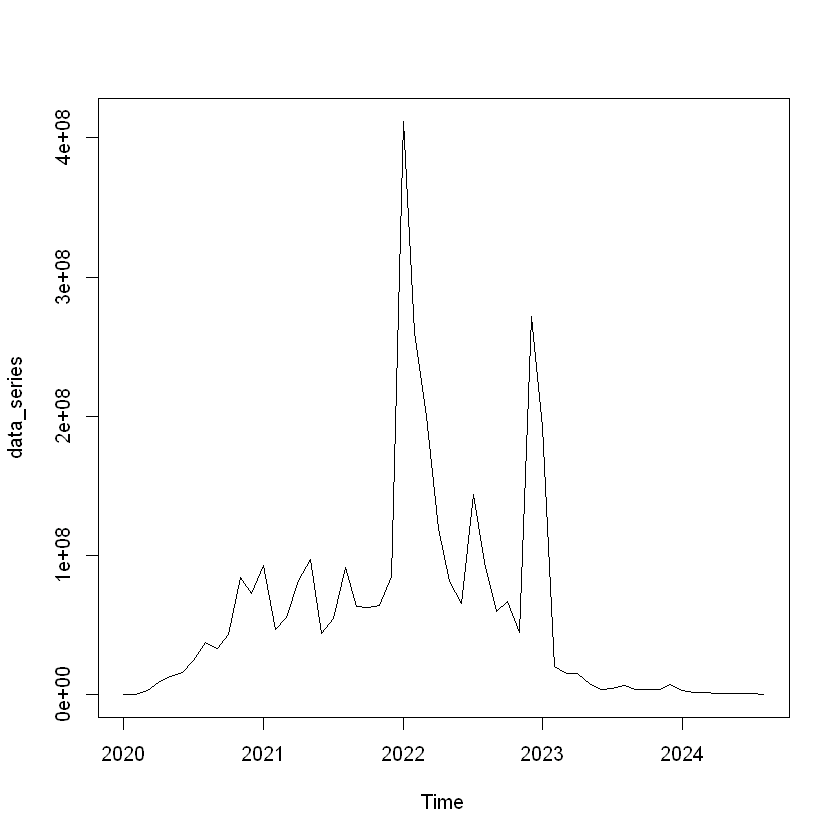

In [8]:
data_series = ts(data_covid_sorting$case_total,start=c(2020, 1), end=c(2024, 8), frequency = 12)
plot(data_series)

# Metode Exponential State Smoothing(ETS)


Forecast method: ETS(M,N,M)

Model Information:
ETS(M,N,M) 

Call:
ets(y = data_series)

  Smoothing parameters:
    alpha = 0.808 
    gamma = 1e-04 

  Initial states:
    l = 56691056.7885 
    s = 1.5265 0.549 0.4828 0.5347 0.9413 0.8783
           0.7811 0.9548 1.0986 0.734 0.9498 2.569

  sigma:  0.665

     AIC     AICc      BIC 
2093.087 2105.087 2123.467 

Error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set -5980787 66438941 35190705 -32038.66 32069.27 0.4557065
                    ACF1
Training set 0.003660103

Forecasts:
         Point Forecast        Lo 80      Hi 80        Lo 95      Hi 95
Sep 2024       202929.4     29990.30   375868.5    -61558.14   467417.0
Oct 2024       183258.2    -34353.21   400869.6   -149549.74   516066.1
Nov 2024       208349.8   -107026.33   523725.9   -273976.37   690676.0
Dec 2024       579280.8   -493064.47  1651626.0  -1060729.74  2219291.3
Jan 2025       974802.2  -1180858.45  3130462.8  -23219

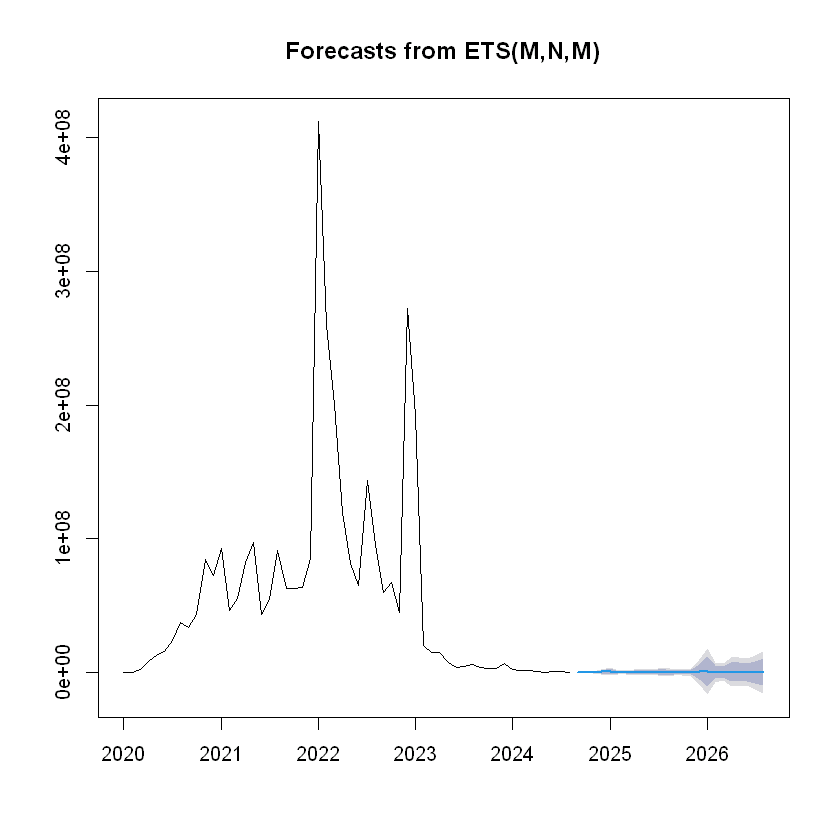

In [9]:
model_ets = ets(data_series)
ets_24 = forecast(model_ets, h=24)
plot(ets_24)
summary(ets_24)


Forecast method: ARIMA(0,0,0) with non-zero mean

Model Information:
Series: data_series 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
          mean
      58721292
s.e.  10847335

sigma^2 = 6.214e+15:  log likelihood = -1097.19
AIC=2198.39   AICc=2198.61   BIC=2202.44

Error measures:
                        ME     RMSE      MAE       MPE     MAPE      MASE
Training set -5.587935e-09 78124666 52572679 -14724.06 14753.53 0.6807966
                  ACF1
Training set 0.6227338

Forecasts:
         Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
Sep 2024       58721292 -42305585 159748168 -95785983 213228567
Oct 2024       58721292 -42305585 159748168 -95785983 213228567
Nov 2024       58721292 -42305585 159748168 -95785983 213228567
Dec 2024       58721292 -42305585 159748168 -95785983 213228567
Jan 2025       58721292 -42305585 159748168 -95785983 213228567
Feb 2025       58721292 -42305585 159748168 -95785983 213228567
Mar 2025       58721292 -42305585 159748168 -95785983 2

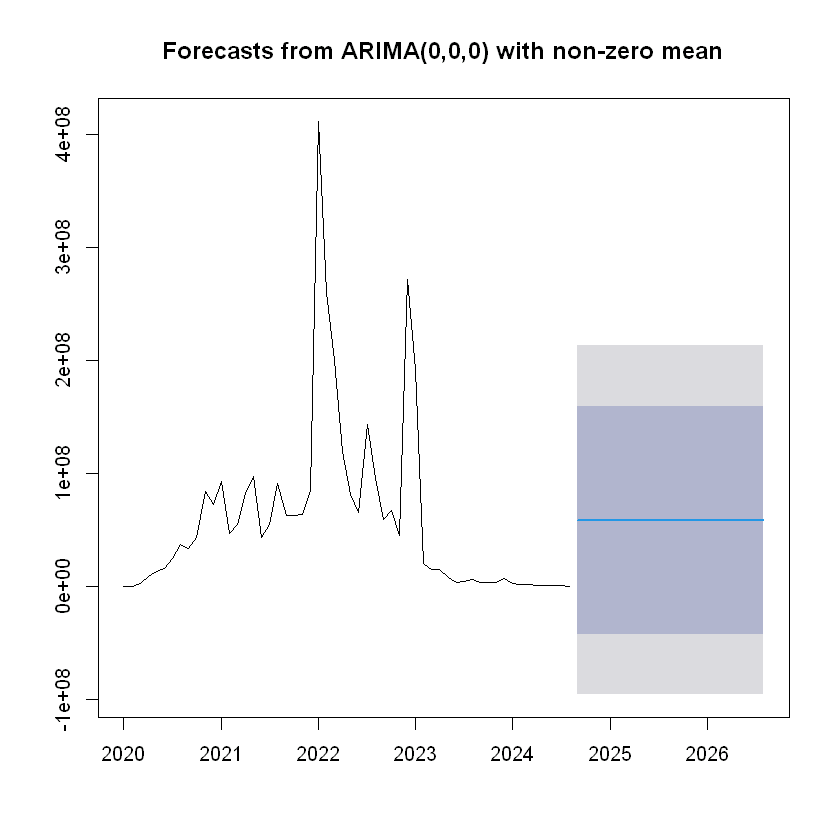

In [ ]:
model_arima = auto.arima(data_series)
arima_24 = forecast(model_arima, h=24)
plot(arima_24)
summary(arima_24)

In [11]:
aic_ets <- AIC(model_ets)
aic_arima <- AIC(model_arima)

aic_ets
aic_arima

[1] 2093.087

[1] 2198.389

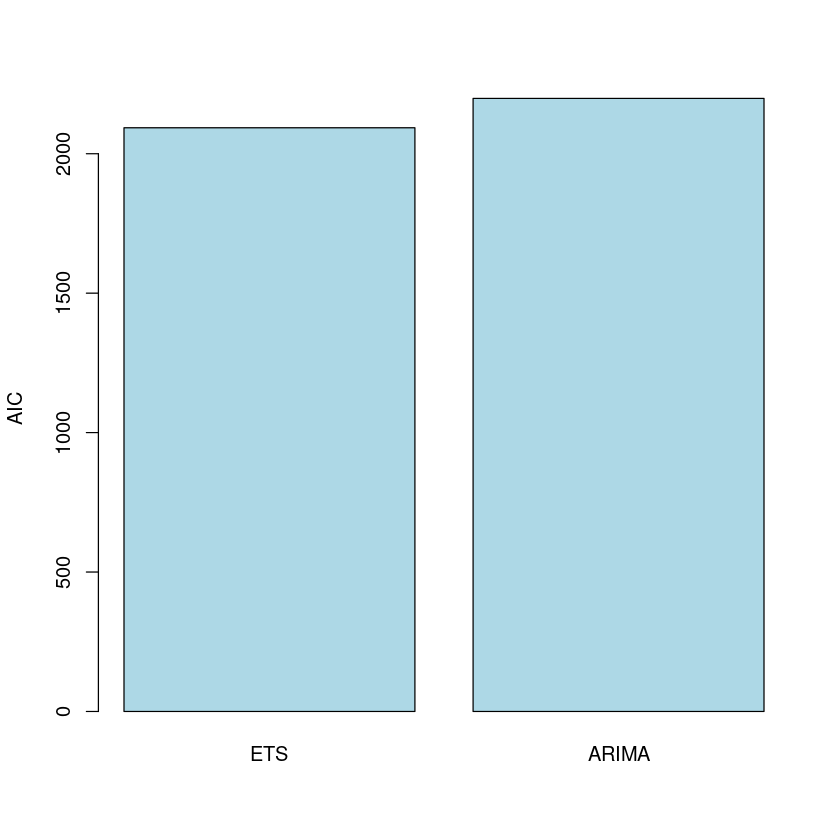

In [ ]:
barplot(c(ETS = model_ets$aic, ARIMA=model_arima$aic), col = "light blue", ylab = "AIC")